In [ ]:
# Importação da biblioteca Pandas 

import pandas as pd


# **Business Understanding**


In [ ]:
# Primeiro vamos ler o dataset para entende-lo de forma macro.
tabela = pd.read_csv('/content/kc_house_data.csv')
tabela.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Sobre os dados disponíveis
 
O Dataset possui 21613 linhas e 21 colunas;

Todas as variáveis são numéricas;

Se trata das casas vendidas em King County entre Maio de 2014 e maio de 2015;

 As colunas são:
 * id - id 
 * Date - Data da venda
 * price - preço
 * bedrooms - quartos
 * bathrooms - banheiros
 * sqft_living -tamanho da área da casa
 * sqft_lot - tamanho do lot
 * floors - Nº de andares
 * waterfront - Na frente do mar ou não(1 ou 0)
 * view - Um índice de 0 a 4 de quão boa era a visão do imóvel
 * condition - Condição da casa de 1 para 5 
 * grade - Qualidade da construção
 * sqft_above - área em pés acima do solo
 * sqft_basmt - área abaixo do solo
 * yr_built - ano de construção
 * yr_renov - ano de renovação - 0 se nunca renovado
 * zipcode - código postal
 * lat - latitude
 * Long - Longitude
 * squft_liv15 - Tamanho interior das 15 casas mais proximas
 * squft_lot15 - Tamanho do lot das 15 casas mais proximas
 * Shape_leng - Comprimento do polígono em metros
 * Shape_Area - área do polígono em metros

### **Os dados são relevantes para o projeto?**

 Para responder essa pergunta, é necessário classificar que dados podem nos levar ao nosso resultado, ou seja, definir quais desses dados vão ajudar a classificar as 5 melhores e 5 piores casas para se investir.

Existem algumas características que as pessoas costumam buscar ao procurar um imóvel.Segurança, estabelecimentos de necessidade primária por perto como mercados, farmácias e infraestura num geral,o imóvel ter documentação, o tamanho e as últimas reformas.

Imóveis próximos de Metrôs e meios de trasnporte, próximos à hotéis e shoppings. Economia da região. Tudo isso pode valorizar um imóvel.Da mesma forma que imóveis próximos à cemitérios desvalorizam.

Portanto, os dados trazem uma solução direta para o resultado. Os dados precisam ser tratados e filtrados.



# Coleta de dados



### **Os dados que eu tenho fazem sentido?**

Alguns dados são mais importantes quando se sabe o número certo de pessoas que vão residir nos imóveis e isso pode segmentar o resultado. Portanto, é interessante repensar a utilização das variáveis do número de banheiros e quartos, já que isso depende da quantidade de pessoas.

Comprimento e área do poligono não trazem tanta relevância já que temos informações sobre tamanho interno e externo do lote.

### **Estão no formato que eu gostaria?**

Date - precisa estar no formato data
Price - precisa estar em dolares com as virgulas no lugar certo
bathrooms( caso seja utilizado) - Precisa estar no formato de inteiros
Variáveis que envolvem área - tranformar pés² para m² (1pé² = 0,092m²)

### **O que mais eu consigo de informação nesses dados?**

Identificar a cidade de cada imóvel.
Calcular o preço por área de imóvel.
Utilizando uma biblioteca de mapas, conseguimos identificar a proximidade dos imóveis em regiões de valor. 

Usar a coluna de ano de construção para ver quantos anos o imóvel possui.


# Limpeza dos Dados

* Remover duplicatas, outliers e valores ausentes.
* Remover variáveis que não serão utilizadas

In [ ]:
tabela

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Removendo os imóveis de mesmo ID.
tabela["id"].drop_duplicates()

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: id, Length: 21436, dtype: int64

In [ ]:
# Removendo valores Nulos

tabela.isnull().sum()

# Como não existem valores nulos no nosso dataframe, não há nada que precisamos remover.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Removendo colunas - bedrooms, bathrooms,sqft_above,sqft_basement
# As explicações de cada drop está destacada na coleta de dados.

tabela = tabela.drop(axis = 1,columns = ['bedrooms','bathrooms','sqft_above','sqft_basement'])
tabela

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,1530,1131,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,2310,5813,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,1020,1350,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,1600,2388,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Transformar os dados da tabela para o melhor formato

tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 

In [ ]:
# 1 - Transformar a coluna date para datetime

tabela['date'] = pd.to_datetime(tabela['date'])
tabela['date']



0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [ ]:
# 2 - Transformar pés em área

tabela['living_area'] = tabela['sqft_living'] * 0.092
tabela['lot_area'] = tabela['sqft_lot'] * 0.092
tabela['area_living15'] = tabela['sqft_living15'] * 0.092
tabela['area_lot15 '] = tabela['sqft_lot15'] * 0.092


In [ ]:

# Criar variável de área livre(Áreas livres valorizam os imóveis)
tabela['free_area'] = tabela['lot_area'] - tabela['living_area']
tabela[['living_area','lot_area','free_area']]


,living_area,lot_area,free_area
0,108.56,519.800,411.240
1,236.44,666.264,429.824
2,70.84,920.000,849.160
3,180.32,460.000,279.680
4,154.56,743.360,588.800
...,...,...,...
21608,140.76,104.052,-36.708
21609,212.52,534.796,322.276
21610,93.84,124.200,30.360
21611,147.20,219.696,72.496


In [ ]:

# drop das areas com medidas em pés e colocando a tabela como tabela2 para realizar alterações
tabela2 = tabela.drop(axis = 1, columns = ["sqft_living","sqft_lot",'sqft_living15','sqft_lot15'])


In [ ]:
tabela2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   floors         21613 non-null  float64       
 4   waterfront     21613 non-null  int64         
 5   view           21613 non-null  int64         
 6   condition      21613 non-null  int64         
 7   grade          21613 non-null  int64         
 8   yr_built       21613 non-null  int64         
 9   yr_renovated   21613 non-null  int64         
 10  zipcode        21613 non-null  int64         
 11  lat            21613 non-null  float64       
 12  long           21613 non-null  float64       
 13  living_area    21613 non-null  float64       
 14  lot_area       21613 non-null  float64       
 15  area_living15  2161

In [ ]:
tabela2['price/area'] = tabela2['price'] / tabela2['lot_area']
tabela2[['price','lot_area','price/area']]

,price,lot_area,price/area
0,221900.0,519.800,426.894960
1,538000.0,666.264,807.487723
2,180000.0,920.000,195.652174
3,604000.0,460.000,1313.043478
4,510000.0,743.360,686.074042
...,...,...,...
21608,360000.0,104.052,3459.808557
21609,400000.0,534.796,747.948751
21610,402101.0,124.200,3237.528180
21611,400000.0,219.696,1820.697691


In [ ]:
# Identificando a cidade de cada imóvel

# Carregando dataset de cidades
df_cidades = pd.read_csv('/content/dataset_cidades.csv')

df_cidades.head()

# MELHORES CIDADES : Bellevue,Kirkland,Redmond,Issaquah e Seattle

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,147643.355747,5.253133e+08
1,2,98002,98002,33,Standard,King County,AUBURN,104440.086791,2.053028e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,123619.720418,3.169395e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,109051.119162,2.017598e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116554.737369,2.114337e+08


In [ ]:
# padronizando nomes das colunas e eliminando ceps duplicados de outras cidades para o join dos dados
df_cidades.columns = df_cidades.columns.str.lower()
df_cidades = df_cidades[df_cidades["county_name"] =="King County"]
df_cidades = df_cidades[["zipcode", "preferred_city"]]
df_cidades



,zipcode,preferred_city
0,98001,AUBURN
1,98002,AUBURN
2,98003,FEDERAL WAY
3,98004,BELLEVUE
4,98005,BELLEVUE
...,...,...
100,98199,SEATTLE
108,98224,BARING
118,98288,SKYKOMISH
147,98354,MILTON


In [ ]:
# merge dos dados para incluir a cidade no dataframe de vendas
tabela2 = tabela2.merge(df_cidades, on = "zipcode", how = "left")

tabela2.head()

,id,date,price,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,living_area,lot_area,area_living15,area_lot15,free_area,price/area,preferred_city
0,7129300520,2014-10-13,221900.0,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,108.56,519.800,123.28,519.800,411.240,426.894960,SEATTLE
1,6414100192,2014-12-09,538000.0,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,236.44,666.264,155.48,702.788,429.824,807.487723,SEATTLE
2,5631500400,2015-02-25,180000.0,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,70.84,920.000,250.24,741.704,849.160,195.652174,KENMORE
3,2487200875,2014-12-09,604000.0,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,180.32,460.000,125.12,460.000,279.680,1313.043478,SEATTLE
4,1954400510,2015-02-18,510000.0,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,154.56,743.360,165.60,690.276,588.800,686.074042,SAMMAMISH


In [ ]:
#Tabela 3 é a tabela 2 com as cidades destacadas
tabela3 = tabela2

tabela3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   floors          21613 non-null  float64       
 4   waterfront      21613 non-null  int64         
 5   view            21613 non-null  int64         
 6   condition       21613 non-null  int64         
 7   grade           21613 non-null  int64         
 8   yr_built        21613 non-null  int64         
 9   yr_renovated    21613 non-null  int64         
 10  zipcode         21613 non-null  int64         
 11  lat             21613 non-null  float64       
 12  long            21613 non-null  float64       
 13  living_area     21613 non-null  float64       
 14  lot_area        21613 non-null  float64       
 15  ar

### Verificação de outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
tabela3.describe()

,id,price,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,living_area,lot_area,area_living15,area_lot15,free_area,price/area
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,191.350776,1389.841016,182.762829,1174.697920,1198.490240,967.029456
std,2.876566e+09,3.671272e+05,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,84.496563,3810.687059,63.056000,2511.984526,3796.996086,1022.339642
min,1.000102e+06,7.500000e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,26.680000,47.840000,36.708000,59.892000,-174.800000,1.773032
25%,2.123049e+09,3.219500e+05,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,131.284000,463.680000,137.080000,469.200000,284.740000,362.318841
50%,3.904930e+09,4.500000e+05,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,175.720000,700.856000,169.280000,701.040000,525.320000,643.731532
75%,7.308900e+09,6.450000e+05,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,234.600000,983.296000,217.120000,927.636000,796.996000,1169.510182
max,9.900000e+09,7.700000e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,1245.680000,151925.028000,571.320000,80150.400000,151805.428000,22034.875419


In [ ]:
px.histogram(tabela3, x = 'price', marginal ='box')

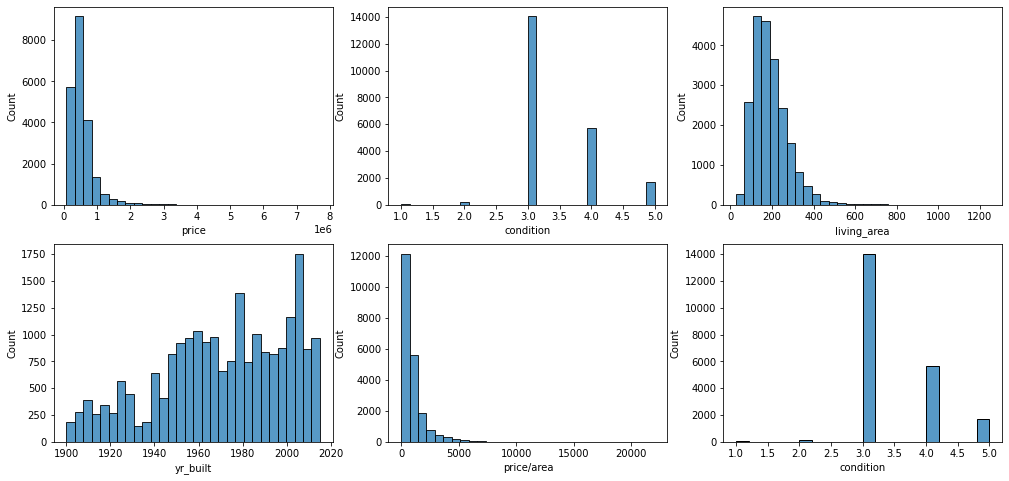

In [ ]:
fig, axes = plt.subplots(2,3 , figsize = (17,8))
sns.histplot(data = tabela3, x= 'price', ax = axes[0,0], bins= 30, legend = True);
sns.histplot(data = tabela3, x= 'condition', ax = axes[0,1], bins= 30, legend = True);
sns.histplot(data = tabela3, x= 'living_area', ax = axes[0,2], bins= 30, legend = True);
sns.histplot(data = tabela3, x= 'yr_built', ax = axes[1,0], bins= 30, legend = True);
sns.histplot(data = tabela3, x= 'price/area', ax = axes[1,1], bins= 30, legend = True);
sns.histplot(data = tabela3, x= 'condition', ax = axes[1,2], bins= 20, legend = True);

Como pode-se ver, o gráfico representa uma distribuição não normal, oque significa que possui alguns valores como outliers.

Para que seja possível realizar estudos estatísticos mais assertivos e tenhamos uma amostra mais proxima da realidade, é preciso excluir os outliers.

Além disso, é importante ressaltar que os outliers estão tendendo para valores extremos de preço, que, no caso que estamos lidando, torna o investimento muito caro.

In [ ]:
# Criando a variável que contém os outliers que eu quero remover
IndexOutliers = tabela3.loc[tabela3['price'] > 1127000].index

# Criando a uma tabela sem os outliers de preço
tabela4 = tabela3.drop(IndexOutliers , axis = 0)

In [ ]:
px.histogram(tabela4, x = 'price', marginal = 'box')

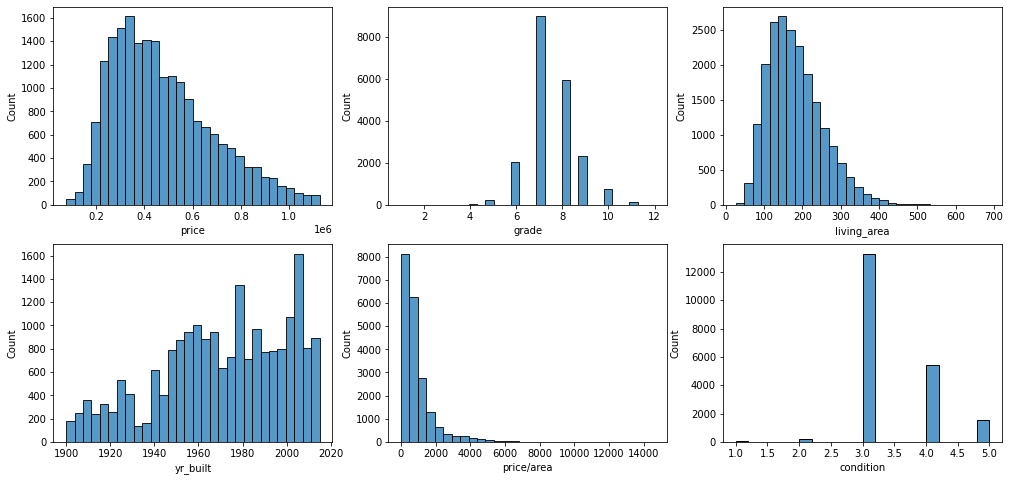

In [ ]:
fig, axes = plt.subplots(2,3 , figsize = (17,8))
sns.histplot(data = tabela4, x= 'price', ax = axes[0,0], bins= 30, legend = True);
sns.histplot(data = tabela4, x= 'grade', ax = axes[0,1], bins= 30, legend = True);
sns.histplot(data = tabela4, x= 'living_area', ax = axes[0,2], bins= 30, legend = True);
sns.histplot(data = tabela4, x= 'yr_built', ax = axes[1,0], bins= 30, legend = True);
sns.histplot(data = tabela4, x= 'price/area', ax = axes[1,1], bins= 30, legend = True);
sns.histplot(data = tabela4, x= 'condition', ax = axes[1,2], bins= 20, legend = True);


### Correlação

É importante verificar a correlação das features para entender quanto uma impacta diretamente na outra.

<AxesSubplot:>

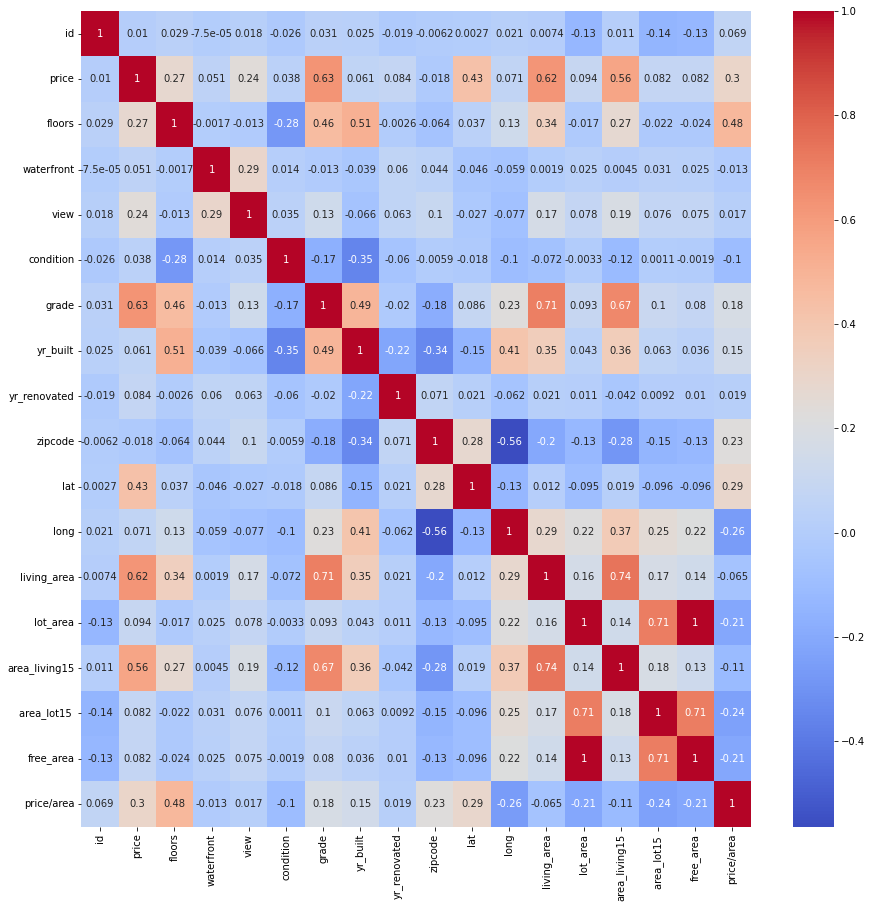

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(tabela4.corr(), cmap = 'coolwarm',annot = True)

Para estipular uma métrica, considerei valores entre 0,7 e 1 como uma correlação forte e valores entre 0,5 e 0,69 como correlação média. O restante conta como correlação baixa.

Portanto, existe uma correlação média entre 'price' e ('living_area','grade')

Bem como existe uma correlação FORTE entre 'grade' e 'living_area'

Em resumo, faz sentido ter uma correlação entre o preço, a área do imóvel e o 'grade'(Classificação da construção por qualidade), pois, quanto mais caro o imóvel, maior a qualidade e o tamanho do mesmo.

Além disso, existe a correlação da área do imóvel com a área dos imóveis mais próximos.


## Resultado

Para encontrar o resultado das 5 melhores imóveis para investir, precisamos definir as 5 prioridades para realizar o filtro.

Portanto:
* Região: Bellevue,Kirkland,Redmond,Issaquah e Seattle
* Condição : >3
* grade: > 7
* yr_built: > 1970
* yr_renovated: != 1
* living_area: > 100

In [ ]:
# Lista de cidades desejadas

cities = ['BELLEVUE','KIRKLAND','REDMOND','ISSAQUAH', 'SEATTLE']

#filtro
Top5_imoveis = tabela4.loc[(tabela4["condition"] > 4) & (tabela4["grade"] > 9) & (tabela4["yr_built"] >= 1970) & (tabela4["price/area"] < 1500 ) & (tabela4['living_area'] > 100) & (tabela4['preferred_city'].isin(cities))]
# Ordenando os 5 melhores da lista de 6
Top5_imoveis_final = Top5_imoveis.sort_values(by = 'price/area').reset_index(inplace = False).drop([5])
display(Top5_imoveis_final[['id','preferred_city','price','condition','grade','yr_built','living_area','price/area']])


,id,preferred_city,price,condition,grade,yr_built,living_area,price/area
0,2125059161,BELLEVUE,960000.0,5,10,1979,315.56,239.549647
1,2616800600,ISSAQUAH,840000.0,5,10,1982,394.68,242.785513
2,5701700011,REDMOND,1050000.0,5,11,1983,402.96,266.853176
3,4139660040,BELLEVUE,760000.0,5,10,1997,292.56,590.062112
4,3761700067,KIRKLAND,959000.0,5,10,1979,305.44,877.803204


Do mesmo jeito, para fazer a lista dos 5 piores imóveis os filtros seriam:

* price > 1.000.000
* price/area > 1000
* condition e grade baixos se houver
* living_area: < 150 se houver

In [ ]:
piores_imoveis = tabela4.loc[(tabela4["condition"] < 3) & (tabela4["grade"] < 7)  & (tabela4["price/area"] > 1000) & (tabela4['living_area'] < 150)]
last5_imoveis = piores_imoveis.sort_values(by='yr_renovated').reset_index().drop([5])
last5_imoveis[['id','price','yr_built','condition','living_area','price/area','preferred_city']]

,id,price,yr_built,condition,living_area,price/area,preferred_city
0,6888900115,555750.0,1913,2,97.52,1237.860834,SEATTLE
1,3331001995,509990.0,1921,2,132.48,1140.845764,SEATTLE
2,3468800310,425000.0,1933,2,69.00,1154.891304,SEATTLE
3,4226900211,560000.0,1900,2,125.12,1046.948146,SEATTLE
4,9828701745,480000.0,1950,2,65.32,1086.956522,SEATTLE


### Conclusão:

Os 5 melhores imóveis para se investir, residem nas melhores e mais movimentadas cidades, todos são recentes alguns com menos de 30 anos.

Além disso, estão por um preço acessível em relação ao seu custo benefício, com áreas de vivência grandese com áreas de lot batendo 4000 m². Proporcionando uma grande área livre para o investidor expandir o imóvele valoriza-lo mais ainda.

Os valores de condição estão em seu máximo e os de qualidade de construção estão bem acima da média. Majoritariamente possuem 2 andares e alguns possuem lavabo.

In [ ]:
Top5_imoveis_final

,index,id,date,price,floors,waterfront,view,condition,grade,yr_built,...,zipcode,lat,long,living_area,lot_area,area_living15,area_lot15,free_area,price/area,preferred_city
0,9325,2125059161,2014-10-23,960000.0,1.5,0,2,5,10,1979,...,98005,47.6426,-122.180,315.56,4007.520,340.40,4087.652,3691.960,239.549647,BELLEVUE
1,18460,2616800600,2014-05-30,840000.0,1.5,0,0,5,10,1982,...,98027,47.4812,-122.033,394.68,3459.844,258.52,3726.920,3065.164,242.785513,ISSAQUAH
2,4474,5701700011,2014-05-23,1050000.0,2.0,0,0,5,11,1983,...,98052,47.7167,-122.109,402.96,3934.748,333.96,3259.100,3531.788,266.853176,REDMOND
3,18196,4139660040,2014-11-21,760000.0,2.0,0,0,5,10,1997,...,98006,47.5501,-122.128,292.56,1288.000,337.64,1329.400,995.440,590.062112,BELLEVUE
4,18281,3761700067,2015-03-06,959000.0,1.0,0,0,5,10,1979,...,98034,47.7212,-122.260,305.44,1092.500,343.16,1092.500,787.060,877.803204,KIRKLAND


Em contra partida, os  piores imóveis possuem áreas de vivência muito pequenas, são supervalorizados por conta da região, condição e qualidade da estrutura abaixo da média.
 A construção mais antiga beira aos 110 anos, sendo que nenhum deles foi renovado.
Fora isso, nao possuem vistas e nem estão de frente para a água para justificar seus valores.

In [ ]:
last5_imoveis

,index,id,date,price,floors,waterfront,view,condition,grade,yr_built,...,zipcode,lat,long,living_area,lot_area,area_living15,area_lot15,free_area,price/area,preferred_city
0,4085,6888900115,2015-02-16,555750.0,1.0,0,0,2,6,1913,...,98118,47.5545,-122.288,97.52,448.960,110.40,448.960,351.440,1237.860834,SEATTLE
1,6694,3331001995,2015-01-23,509990.0,2.0,0,0,2,6,1921,...,98118,47.5503,-122.285,132.48,447.028,125.12,419.336,314.548,1140.845764,SEATTLE
2,11224,3468800310,2015-01-13,425000.0,1.0,0,0,2,6,1933,...,98108,47.5400,-122.320,69.00,368.000,106.72,368.000,299.000,1154.891304,SEATTLE
3,14797,4226900211,2014-10-23,560000.0,1.5,0,0,2,6,1900,...,98122,47.6038,-122.314,125.12,534.888,92.92,534.888,409.768,1046.948146,SEATTLE
4,18242,9828701745,2015-01-23,480000.0,1.0,0,0,2,6,1950,...,98112,47.6212,-122.298,65.32,441.600,136.16,158.332,376.280,1086.956522,SEATTLE
